## Polynomial interpolation: Error theory

We start by executing some boilerplate code. Afterwards we recall the definition
of the `python` function `cardinal` and `lagrange` from the previous lecture.

In [9]:
# %matplotlib widget

import numpy as np
from numpy import pi
from numpy.linalg import solve, norm    # Solve linear systems and compute norms
import matplotlib.pyplot as plt

newparams = {'figure.figsize': (6.0, 6.0), 'axes.grid': True,
             'lines.markersize': 8, 'lines.linewidth': 2,
             'font.size': 14}
plt.rcParams.update(newparams)

In [10]:
def cardinal(xdata, x):
    """
    cardinal(xdata, x): 
    In: xdata, array with the nodes x_i.
        x, array or a scalar of values in which the cardinal functions are evaluated.
    Return: l: a list of arrays of the cardinal functions evaluated in x. 
    """
    n = len(xdata)              # Number of evaluation points x
    l = []
    for i in range(n):          # Loop over the cardinal functions
        li = np.ones(len(x))
        for j in range(n):      # Loop to make the product for l_i
            if i is not j:
                li = li*(x-xdata[j])/(xdata[i]-xdata[j])
        l.append(li)            # Append the array to the list            
    return l

def lagrange(ydata, l):
    """
    lagrange(ydata, l):
    In: ydata, array of the y-values of the interpolation points.
         l, a list of the cardinal functions, given by cardinal(xdata, x)
    Return: An array with the interpolation polynomial. 
    """
    poly = 0                        
    for i in range(len(ydata)):
        poly = poly + ydata[i]*l[i]  
    return poly

### Error Theory
Given some function $f\in C[a,b]$. Choose $n+1$ distinct nodes in
$[a,b]$ and let $p_n(x) \in \mathbb{P}_n$ satisfy the interpolation
condition

$$
p_n(x_i) = f(x_i), \qquad i=0,\dots,n.
$$

What can be said about the error $e(x)=f(x)-p_n(x)$?

The goal of this section is to cover a few theoretical aspects, and to
give the answer to the natural question:
* If the polynomial is used to approximate a function, can we find an
  expression for the error?

* How can the error be made as small as possible? 

Let us start with an numerical experiment, to have a certain feeling
of what to expect.

:::{prf:example} Interpolation of $\sin x$
:label: exa-interpol-sin

Let $f(x)=\sin(x)$, $x\in [0,2\pi]$. Choose $n+1$ equidistributed
nodes, that is $x_i=ih$, $i=0,\dots,n$, and $h=2\pi/n$. 

Calculate the interpolation polynomial using the functions `cardinal` and
`lagrange`. Plot the error $e_n(x)=f(x)-p_n(x)$ for different values
of $n$. Choose $n=4,8,16$ and $32$.  Notice how the error is
distributed over the interval, and find the maximum error
$\max_{x\in[a,b]}|e_n(x)|$ for each $n$.

:::

In [11]:
# Define the function
def f(x):
    return np.sin(x)
    

# Set the interval 
a, b = -5, 5                  # The interpolation interval
x = np.linspace(a, b, 101)    # The 'x-axis' 

# Set the interpolation points
n = 6                          # Interpolation points
xdata = np.linspace(a, b, n+1)  # Equidistributed nodes (can be changed)
ydata = f(xdata)                

# Evaluate the interpolation polynomial in the x-values
l = cardinal(xdata, x)  
p = lagrange(ydata, l)

Max error is 2.86e-01


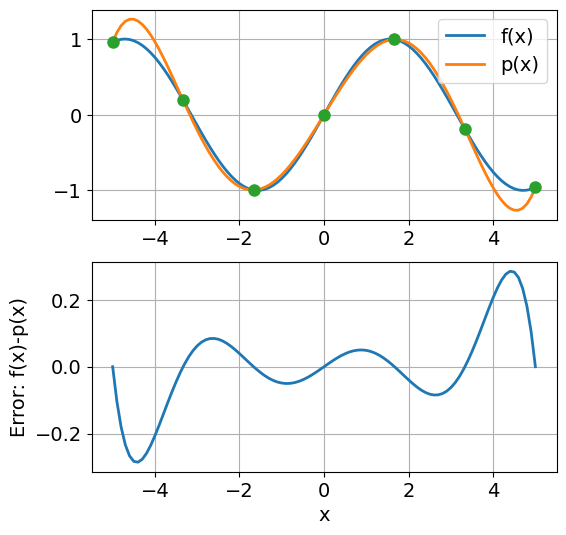

In [12]:
# Plot f(x) og p(x) and the interpolation points
plt.figure()
plt.subplot(2,1,1)                  
plt.plot(x, f(x), x, p, xdata, ydata, 'o')
plt.legend(['f(x)','p(x)'])
plt.grid(True)

# Plot the interpolation error
plt.subplot(2,1,2)
plt.plot(x, (f(x)-p))
plt.xlabel('x')
plt.ylabel('Error: f(x)-p(x)')
plt.grid(True)
print("Max error is {:.2e}".format(max(abs(p-f(x)))))

:::{exercise} Interpolation of $\tfrac{1}{1+x^2}$
:label: exe-interpol-runge

Repeat the previous experiment with Runge's function

$$
f(x) = \frac{1}{1+x^2}, \qquad x\in [-5,5].
$$

In [ ]:
# Insert your code here

:::{solution-start} exe-interpol-runge
:::

In [13]:
# Define the function
def r(x):
    return 1/(1+x**2)
    
# Set the interval 
a, b = -5, 5                  # The interpolation interval
x = np.linspace(a, b, 101)    # The 'x-axis' 

# Set the interpolation points
n = 10                            # Interpolation points
xdata = np.linspace(a, b, n+1)  # Equidistributed nodes (can be changed)
ydata = r(xdata)                

# Evaluate the interpolation polynomial in the x-values
l = cardinal(xdata, x)  
p = lagrange(ydata, l)

Max error is 1.92e+00


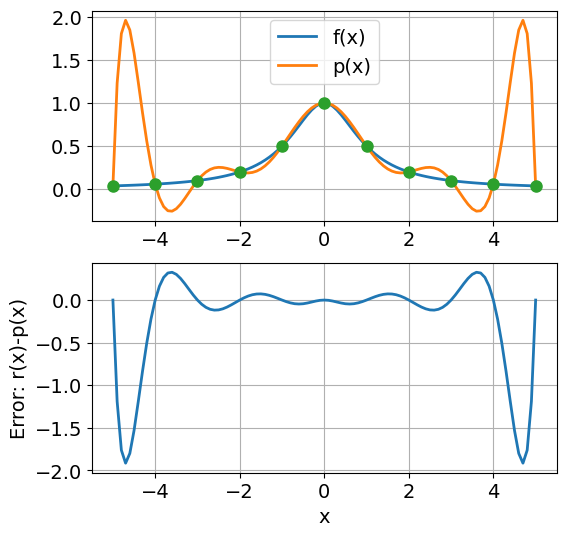

In [14]:
# Plot rx) og p(x) and the interpolation points
plt.figure()
plt.subplot(2,1,1)                  
plt.plot(x, r(x), x, p, xdata, ydata, 'o')
plt.legend(['f(x)','p(x)'])
plt.grid(True)

# Plot the interpolation error
plt.subplot(2,1,2)
plt.plot(x, (r(x)-p))
plt.xlabel('x')
plt.ylabel('Error: r(x)-p(x)')
plt.grid(True)
print("Max error is {:.2e}".format(max(abs(p-r(x)))))

:::{solution-end}
:::

:::{prf:observation}

We see that approximation of Runge's functions is much worse then for the $\sin(x)$ function and is not uniformly bounded. In fact, it seems that
the maximum error does not decrease with an increasing number of (uniformly distributed!) interpolation nodes, but the large errors are squeezed more and more
towards to interval endpoints.

:::

**Taylor polynomials once more.**
Before we turn to the analysis of the interpolation error
$e(x) = f(x) - p_n(x)$, we quickly recall (once more)
Taylor polynomials and their error representation.
For $f \in C^{n+1}[a,b]$ and $x_0 \in (a,b)$,
we defined the $n$-th order Taylor polynomial $T^n_{x_0}f(x)$
of $f$ around $x_0$ by

$$
\begin{align*}
T^n_{x_0}f(x) &:= \sum_{k=0}^{n} \frac{f^{(k)}(x_0)}{k!}(x-x_0)^k
\end{align*}
$$

Note that the Taylor polynomial is in fact a polynomial of order $n$
which not only interpolates $f$ in $x_0$, but also
its first, second etc. and $n$-th derivative $f', f'', \ldots f^{(n)}$ in $x_0$!

So the Taylor polynomial the unique polynomial of order $n$ which
interpolates the *first $n$ derivatives*
of $f$ in a *single point $x_0$*. In contrast,
the interpolation polynomial $p_n$ is the unique polynomial of order $n$
which *interpolates only the $0$-order* (that is, $f$
itself), but in *$n$ distinctive points* $x_0, x_1,\ldots x_n$.

For the Taylor polynomial $T^n_{x_0}f(x)$ we have the error
representation

$$
\begin{align*}
f(x) - T^n_{x_0}f(x) = R_{n+1}(x_0) \qquad
\text{where }
R_{n+1}(x_0) = \frac{f^{(n+1)}(\xi)}{(n+1)!} (x-x_0)^{n+1},
\end{align*}
$$

with $\xi$ between $x$ and $x_0$.

Of course, we usually don't know the exact location of $\xi$
and thus not the exact error,
but we can at least estimate
it and bound it from above:

$$
|f(x) - T^n_{x_0}f(x)| \leqslant
 \frac{M}{(n+1)!} h^{n+1}
$$

where

$$
M=\max_{x\in[a,b]}|f^{(n+1)}(x)| \qquad \text{and} \qquad h = |x-x_0|.
$$

The next theorem gives us an  expression for the interpolation
error $e(x)=f(x)-p_n(x)$ which is similar to what we have just
seen for the error between the Taylor polynomial and the original function
$f$.

:::{prf:theorem} Interpolation error
:label: thm-interpol-error

Given $f \in C^{(n+1)}[a,b]$. Let $p_{n} \in \mathbb{P}_n$ interpolate $f$ in
$n+1$ distinct nodes $x_i \in [a,b]$. For each $x\in [a,b]$ there is at least
one $\xi(x) \in (a,b)$ such that

$$
f(x) - p_n(x) = \frac{f^{(n+1)}(\xi(x))}{(n+1)!}\prod_{i=0}^n(x-x_i).
$$

**Proof.**

We start fromt the Newton polynomial $\omega_{n+1} =: \omega(x)$

$$
\omega(x) = \prod_{i=0}^{n}(x-x_i) = x^{n+1} + \dotsm.
$$

Clearly, the error in the nodes, $e(x_i)=0$. 
Choose an *arbitrary* $x\in [a,b]$, $x\in [a,b]$, where $x\not=x_i$,
$i=0,1,\dotsc,n$. For this fixed $x$, define a function in $t$ as:

$$
\varphi(t) = e(t)\omega(x) - e(x)\omega(t).
$$

where $e(t) = f(t)-p_n(t)$.

Notice that $\varphi(t)$ is as differentiable with respect to $t$ as $f(t)$. The
function $\varphi(t)$ has $n+2$ distinct zeros (the nodes and the fixed x). As a
consequence of [Rolle's theorem](https://en.wikipedia.org/wiki/Rolle's_theorem),  the derivative
$\varphi'(t)$ has at least $n+1$ distinct zeros, one between each of the zeros
of $\varphi(t)$. So $\varphi''(t)$ has $n$ distinct
zeros, etc. By repeating this argument, we can see that $\varphi^{n+1}(t)$
has at least one zero in $[a,b]$, let us call this $\xi(x)$, as it does depend on the fixed $x$.

 Since
$\omega^{(n+1)}(t)=(n+1)!$ and $e^{(n+1)}(t)=f^{(n+1)}(t)$ we obtain

$$
\varphi^{(n+1)}(\xi)= 0 = f^{(n+1)}(\xi)\omega(x) - e(x)(n+1)!
$$

which concludes the proof.

 :::{prf:observation}

The interpolation error consists of three elements: The derivative of the
function $f$, the number of interpolation points $n+1$ and the distribution of
the nodes $x_i$. We cannot do much with the first of these, but we can choose
the two others. Let us first look at the most obvious choice of nodes.

:::

### Equidistributed nodes

The nodes are *equidistributed* over the interval $[a,b]$ if $x_i=a+ih$, $h=(b-a)/n$, $i=0,\ldots, n$ In this case it can
be proved that:

$$
|\omega(x)| \leq \frac{h^{n+1}}{4}n!
$$

such that

$$
|e(x)| \leq \frac{h^{n+1}}{4(n+1)}M, \qquad M=\max_{x\in[a,b]}|f^{(n+1)}(x)|.
$$

for all $x\in [a,b]$. 

Let us now see how good this error bound is by an example.

:::{exercise} Interpolation error for $\sin(x)$ revisited
:label: exe-interpol-sin

Let again $f(x)=\sin(x)$ and $p_n(x)$ the polynomial interpolating $f(x)$ in
$n+1$ equidistributed points on $ [a,b] = [0,2\pi]$.
An upper bound for the error for different values of $n$
can be found easily. Clearly,
$\max_{x\in[0,2\pi]}|f^{(n+1)}(x)|=M=1$ for all $n$, so

$$
|e_n(x)| = |f(x)-p_n(x)| \leq
\frac{1}{4(n+1)}\left(\frac{2\pi}{n}\right)^{n+1}, \qquad x\in[a,b].
$$

Use the code in the first Example of this lecture to verify the result
for $n = 2, 4, 8, 16$. How close is the bound to the real error?
:::

In [ ]:
# Insert your code here

### Optimal choice of interpolation points
So how can the error be reduced? For a given $n$ there is only one choice: to
distribute the nodes in order to make the maximum of
$|\omega(x)|= \prod_{j=0}^{n}|x-x_i|$ as small as possible. We will first do this
on a standard interval $[-1,1]$, and then transfer the results to some arbitrary
interval $[a,b]$.

Let us start taking a look at $\omega(x)$ for equidistributed nodes on the
interval $[-1,1]$, for
different values of $n$:

In [15]:
newparams = {'figure.figsize': (6,3)}
plt.rcParams.update(newparams)

def omega(xdata, x):
    # compute omega(x) for the nodes in xdata
    n1 = len(xdata)
    omega_value = np.ones(len(x))             
    for j in range(n1):
        omega_value = omega_value*(x-xdata[j])  # (x-x_0)(x-x_1)...(x-x_n)
    return omega_value

n = 10, max|omega(x)| = 1.26e-02


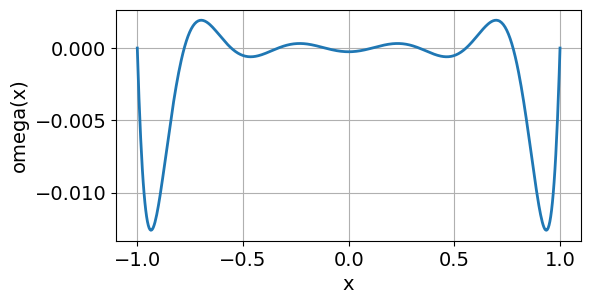

In [24]:
# Plot omega(x) 
n = 10                           # Number of interpolation points is n+1
a, b = -1, 1                    # The interval
x = np.linspace(a, b, 501)        
xdata = np.linspace(a, b, n) 
plt.plot(x, omega(xdata, x))
plt.grid(True)
plt.xlabel('x')
plt.ylabel('omega(x)')
print("n = {:2d}, max|omega(x)| = {:.2e}".format(n, max(abs(omega(xdata, x)))))

Run the code for different values of $n$. Notice the following: 
* $\max_{x\in[-1,1]} |\omega(x)|$ becomes smaller with increasing $n$. 

* $|\omega(x)|$ has its maximum values near the boundaries of $[-1, 1]$.

A a consequence of the latter, it seems reasonable to move the nodes towards the boundaries. 
It can be proved that the optimal choice of nodes are the *Chebyshev-nodes*, given by

$$
\tilde{x}_i = \cos \left( \frac{(2i+1)\pi}{2(n+1)} \right), \qquad i=0,\dotsc,n
$$

![Chebyshev nodes](Chebyshev-nodes.png)

Chebyshev nodes. Figure taken from {cite}`Holmes2023`, p.233. 


Let $\omega_{Cheb}(x) = \prod_{j=1}^n(x-\tilde{x}_i)$. It is then possible to prove that

$$
\frac{1}{2^{n}} = \max_{x\in [-1, 1]} |\omega_{Cheb}(x)| \leq \max_{x \in [-1, 1]} |q(x)|
$$

for all polynomials $q\in \mathbb{P}_n$ such that $q(x)=x^n + c_{n-1}x^{n-1}+\dotsm+c_1x + c_0$.

The distribution of nodes can be transferred to an interval $[a,b]$ by the linear transformation

$$
x = \frac{b-a}{2}\tilde{x} + \frac{b+a}{2}
$$

where $x\in[a,b]$ and $\tilde{x} \in [-1,1]$.

By doing so we get

$$
\omega(x) = \prod_{j=0}^n (x-x_i) =
  \left(\frac{b-a}{2}\right)^{n+1} \prod_{j=0}^n (\tilde{x}-\tilde{x}_i)
  = \left(\frac{b-a}{2}\right)^{n+1} \omega_{Cheb}(\tilde{x}).
$$

From the theorem on interpolation errors we can conclude:

:::{prf:theorem} Interpolation error for Chebyshev interpolation

Given $f \in C^{(n+1)}[a,b]$, and let $M_{n+1} = \max_{x\in [a,b]}|f^{(n+1)}(x)|$.  Let $p_{n} \in \mathbb{P}_n$ interpolate $f$ i $n+1$ Chebyshev-nodes $x_i \in [a,b]$. Then

$$
\max_{x\in[a,b]}|f(x) - p_n(x)| \leq \frac{(b-a)^{n+1}}{2^{2n+1}(n+1)!} M_{n+1}.
$$

:::

The Chebyshev nodes over an interval $[a,b]$ are evaluated in the following function:

In [74]:
def chebyshev_nodes(a, b, n):
    # n Chebyshev nodes in the interval [a, b] 
    i = np.array(range(n))                 # i = [0,1,2,3, ....n-1]
    x = np.cos((2*i+1)*pi/(2*(n)))         # nodes over the interval [-1,1]
    return 0.5*(b-a)*x+0.5*(b+a)        # nodes over the interval [a,b]

:::{exercise} Chebyshev interpolation
:label: exe-cheby-interpol

**a)**
Plot $\omega_{Cheb}(x)$ for $3, 5, 9, 17$ interpolation points on the interval $[-1,1]$.

**b)**
Repeat Example 3 using Chebyshev interpolation on the functions below. Compare with the results you got from equidistributed nodes.

\begin{align*}
  f(x) &= \sin(x), && x\in[0,2\pi] \\ 
  f(x) &= \frac{1}{1+x^2}, && x\in[-5,5]. 
\end{align*}

:::

:::{solution-start} exe-cheby-interpol
:::

**a)** Let's plot  $\omega(x)$  first for $n$ equidistributed nodes and then $\omega_{Cheb}(x)$ for $5, 9, 17, 25$ interpolation points on the interval $[-1,1]$.

In [78]:
# Insert your code here
# Define number of interpolation points
n = 17
# 
a, b = -1, 1                    # The interval
x = np.linspace(a, b, 501)

n = 17, max|omega(x)| = 9.43e-04


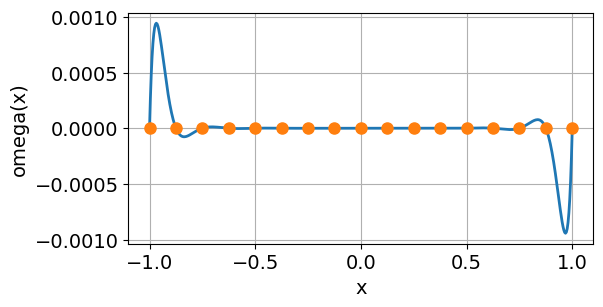

In [79]:
# equidistributes nodes
xdata = np.linspace(a, b, n) 

plt.plot(x, omega(xdata, x))
plt.plot(xdata,omega(xdata, xdata), "o")
plt.grid(True)
plt.xlabel('x')
plt.ylabel('omega(x)')
print("n = {:2d}, max|omega(x)| = {:.2e}".format(n, max(abs(omega(xdata, x)))))

n = 17, max|omega(x)| = 1.53e-05


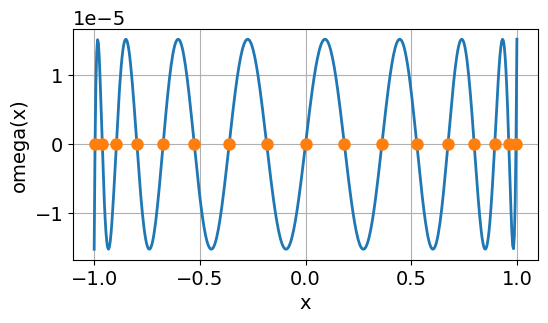

In [81]:
# Chebyshev nodes
xdata = chebyshev_nodes(a, b, n) 

plt.plot(x, omega(xdata, x))
plt.plot(xdata,omega(xdata, xdata), "o")
plt.grid(True)
plt.xlabel('x')
plt.ylabel('omega(x)')
print("n = {:2d}, max|omega(x)| = {:.2e}".format(n, max(abs(omega(xdata, x)))))

**b)** 
Let's interpolate the following functions

\begin{align*}
  f(x) &= \sin(x), && x\in[0,2\pi] \\ 
  f(x) &= \frac{1}{1+x^2}, && x\in[-5,5]. 
\end{align*}

using Chebyshev interpolation nodes.

In [86]:
# Define the function
def f(x):
    return 1/(1+x**2)

# Set the interval 
a, b = -5, 5                  # The interpolation interval
#a, b = 0, 2*pi               # The interpolation interval
x = np.linspace(a, b, 101) # The 'x-axis' 

# Set the interpolation points
n = 16                         # Interpolation points
#xdata = np.linspace(a, b, n) # Equidistributed nodes (can be changed)
xdata = chebyshev_nodes(a, b, n)
ydata = f(xdata)                

# Evaluate the interpolation polynomial in the x-values
l = cardinal(xdata, x)  
p = lagrange(ydata, l)

Max error is 8.31e-02


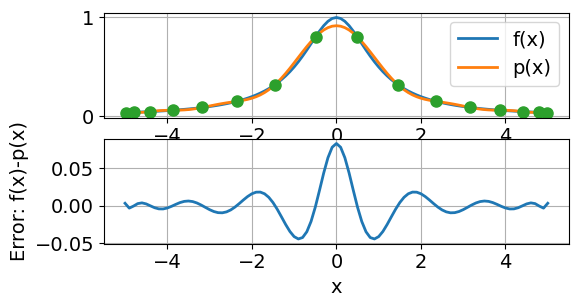

In [87]:
# Plot f(x) og p(x) and the interpolation points
plt.subplot(2,1,1)                  
plt.plot(x, f(x), x, p, xdata, ydata, 'o')
plt.legend(['f(x)','p(x)'])
plt.grid(True)

# Plot the interpolation error
plt.subplot(2,1,2)
plt.plot(x, (f(x)-p))
plt.xlabel('x')
plt.ylabel('Error: f(x)-p(x)')
plt.grid(True)
print("Max error is {:.2e}".format(max(abs(p-f(x)))))

:::{solution-end}
:::

**For information**: 
[Chebfun](http://www.chebfun.org/) is software package which makes it possible to manipulate functions and to solve equations with accuracy close to machine accuracy. The algorithms are based on polynomial interpolation in Chebyshev nodes.

:::{admonition} TODO
:class: danger dropdown

Add ipywidgets slider for better visualization/interactivity.

:::